In [67]:
%pip install pandas numpy matplotlib scikit-learn seaborn nltk wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 19.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
data = pd.read_csv('UpdatedResumeDataSet.csv')
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [34]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [42]:
result = data.groupby('Category')[['Category']].count()
result.Category

Category
Advocate                     20
Arts                         36
Automation Testing           26
Blockchain                   40
Business Analyst             28
Civil Engineer               24
Data Science                 40
Database                     33
DevOps Engineer              55
DotNet Developer             28
ETL Developer                40
Electrical Engineering       30
HR                           44
Hadoop                       42
Health and fitness           30
Java Developer               84
Mechanical Engineer          40
Network Security Engineer    25
Operations Manager           40
PMO                          30
Python Developer             48
SAP Developer                24
Sales                        40
Testing                      70
Web Designing                45
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

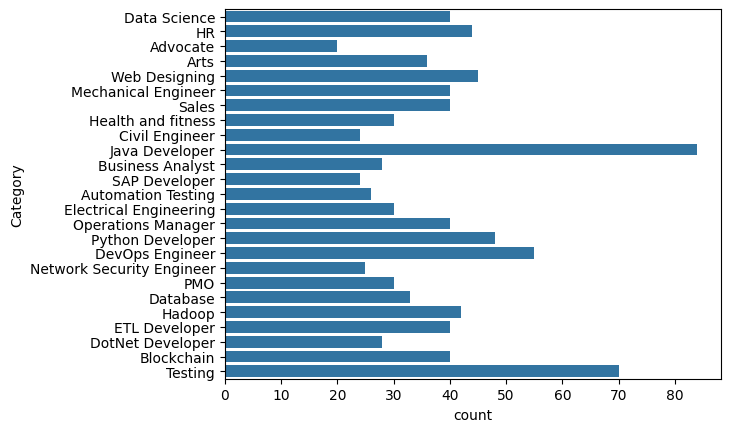

In [50]:
sns.countplot(y='Category',data=data)

Data Cleaning

In [51]:
import re

In [60]:
def cleanResume(resumeText):
    # Remove URLs
    resumeText = re.sub(r'http\S+', ' ', resumeText)
    # Remove hashtags
    resumeText = re.sub(r'#\S+', ' ', resumeText)
    # Remove mentions
    resumeText = re.sub(r'@\S+', ' ', resumeText)
    # Remove punctuations
    resumeText = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', resumeText)
    # Remove extra whitespace
    resumeText = re.sub(r'\s+', ' ', resumeText).strip()
    return resumeText

data['cleaned_resume'] = data.Resume.apply(lambda x:cleanResume(x))

In [61]:
data

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B.E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details MCA YMCAUST, Faridabad, Hary..."
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [69]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud